In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fb.csv',parse_dates=True,index_col = 'Date')

In [3]:
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


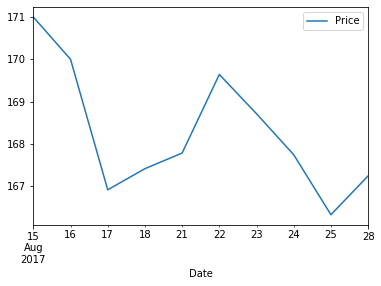

In [5]:
%matplotlib inline
df.plot()

<img src='1.png' />

In [6]:
# shift 位移

In [7]:
df.head(5)

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78


In [8]:
df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [9]:
df.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [10]:
df['Prev Day Price'] = df['Price'].shift(1)

In [11]:
df.head(5)

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41


In [12]:
df['Price Change' ] = df['Price'] - df['Prev Day Price']

In [13]:
df.head()

,Price,Prev Day Price,Price Change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37


In [14]:
df['5 day return' ] = ((df['Price'] - df['Price'].shift(5))/df['Price'].shift(5) ) * 100

In [16]:
df.head(15)

,Price,Prev Day Price,Price Change,5 day return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [17]:
# tshift

In [18]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [19]:
df.index = pd.date_range(start='2017-8-15',periods=10,freq='B')

In [20]:
df

,Price,Prev Day Price,Price Change,5 day return
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096
2017-08-28,167.24,166.32,0.92,-0.321850


In [21]:
df.tshift(1)

,Price,Prev Day Price,Price Change,5 day return
2017-08-16,171.00,NaN,NaN,NaN
2017-08-17,170.00,171.00,-1.00,NaN
2017-08-18,166.91,170.00,-3.09,NaN
2017-08-21,167.41,166.91,0.50,NaN
2017-08-22,167.78,167.41,0.37,NaN
2017-08-23,169.64,167.78,1.86,-0.795322
2017-08-24,168.71,169.64,-0.93,-0.758824
2017-08-25,167.74,168.71,-0.97,0.497274
2017-08-28,166.32,167.74,-1.42,-0.651096
2017-08-29,167.24,166.32,0.92,-0.321850


In [22]:
# diff

In [23]:
df =pd.DataFrame(
{
     'a':[1,2,3,4,5,6,7],
     'b':[11,21,31,41,51,61,71],
     'c':[13,23,33,43,53,63,73],
    
    
}

)

In [24]:
df

,a,b,c
0,1,11,13
1,2,21,23
2,3,31,33
3,4,41,43
4,5,51,53
5,6,61,63
6,7,71,73


In [25]:
df.diff()

,a,b,c
0,NaN,NaN,NaN
1,1.0,10.0,10.0
2,1.0,10.0,10.0
3,1.0,10.0,10.0
4,1.0,10.0,10.0
5,1.0,10.0,10.0
6,1.0,10.0,10.0


In [26]:
df.diff(axis=1)

,a,b,c
0,NaN,10.0,2.0
1,NaN,19.0,2.0
2,NaN,28.0,2.0
3,NaN,37.0,2.0
4,NaN,46.0,2.0
5,NaN,55.0,2.0
6,NaN,64.0,2.0


In [28]:
df.diff(periods=-1)

,a,b,c
0,-1.0,-10.0,-10.0
1,-1.0,-10.0,-10.0
2,-1.0,-10.0,-10.0
3,-1.0,-10.0,-10.0
4,-1.0,-10.0,-10.0
5,-1.0,-10.0,-10.0
6,NaN,NaN,NaN


In [ ]:
# diff =  df - df.shift()